<a href="https://colab.research.google.com/github/jcandane/Lightfield/blob/main/lightfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter

#plt.style.use("dark_background")

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

In [2]:
def rotation_matrix(θ):
    """
    GIVEN: θ (angle in degrees)
    GET:   R (the 3 rotation matrices)
    """

    θ *= np.pi/180 ## degrees to radians
    R_yz = np.array([[1.,        0.,         0.], 
                     [0., np.cos(θ), -np.sin(θ)], 
                     [0., np.sin(θ), np.cos(θ)]])
    R_xz = np.array([[ np.cos(θ), 0., np.sin(θ)], 
                     [        0., 1.,        0.], 
                     [-np.sin(θ), 0., np.cos(θ)]])
    R_xy = np.array([[np.cos(θ), -np.sin(θ), 0.], 
                     [np.sin(θ),  np.cos(θ), 0.], 
                     [0.       ,         0., 1.]])

    return np.asarray([R_yz, R_xz, R_xy])

class lightfield(object):
    ''' A class of Light Field Pulses '''
    def __init__(self, helicity=[1.0, 0.0, 0.0], ω=0., E0=1., dt=0.01, T=10, Γ=np.inf, t0=0., phase=0.):
        self.helicity = np.asarray(helicity)
        self.ω = ω
        self.Γ = Γ
        self.phase = phase
        self.t0 = t0
        self.E0 = E0

        π = np.pi

        self.dt = dt
        self.T  = T
        self.dω = 2*π / (self.T-self.dt)
        self.Ω  = π / self.dt

        self.timefield = np.arange(0., self.T, self.dt)
        self.freqfield = np.linspace(-self.Ω, self.Ω, len(self.timefield), endpoint=True)
        self.freqline  = np.arange(-self.Ω, self.Ω+self.dω, self.dω)

        E_t = self.E0 * np.exp( - 4*np.log(2) * (self.timefield - self.t0)**2/(self.Γ**2) - 1j * self.ω * (self.timefield - self.t0) + 1j * self.phase )
        E_ω = self.E0 * self.Γ / (np.sqrt( 8*np.log(2) )) * np.exp( - ( self.Γ**2 * (self.ω - self.freqfield)**2 )/( 16*np.log(2) ) + 1j * (self.phase + self.freqfield * self.t0) )
        B_t = None ## fill in!!!

        self.E_tx      = E_t[:,None] * self.helicity[None,:]
        self.E_ωx      = E_ω[:,None] * self.helicity[None,:]
        self.B_tx      = None
        self.B_ωx      = None        
        self.F_tuv     = None
        self.F_ωuv     = None
        
    def getE(self, get_Real=True):
        """ Scalar E-field for a given time/instant t """
        E_t = self.E0 * np.exp( - 4*np.log(2) * (self.timefield - self.t0)**2/(self.Γ**2) - 1j * self.ω * (self.timefield - self.t0) + 1j * self.phase )
        self.E_tx = E_t[:,None] * self.helicity[None,:]
        if get_Real:
            return (E_t).real
        else:
            return self.E_t
    
    def get_A(self):
        """ Analytic Fourier Transform for Gaussian Wavepacket """
        self.E_ω = self.E0 * self.Γ / (np.sqrt( 8*np.log(2) )) * np.exp( - ( self.Γ**2 * (self.ω - ω)**2 )/( 16*np.log(2) ) ) * np.exp( 1j * (self.phase + ω * self.t0) )
        return self.E_ω
    
    def get_F(self):
        return None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


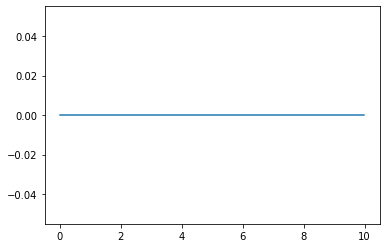

In [3]:
field3    = lightfield()
field3.dt = 0.01
field3.T  = 10.0
field3.E0 = 1e-1
field3.ω  = 1
#field3.Γ  = 10.
field3.helicity = np.array([1.,0.,0.])

#plt.plot(field3.timefield, field3.getE())
plt.plot(field3.timefield, field3.E_tx[:,2].real)
plt.show()

In [4]:
print( field3.freqfield.shape )
print( field3.freqline.shape )
print( field3.timefield.shape )

(1000,)
(1001,)
(1000,)


In [5]:
print(field3.freqfield[0])
print(field3.freqfield[-1])
print(field3.freqline[0])
print(field3.freqline[-1])

-314.1592653589793
314.1592653589793
-314.1592653589793
314.7882128371737


In [6]:
print(field3.dω)
print(-field3.freqline[0] + field3.freqline[1])

0.6289474781961548
0.628947478196153


In [7]:
k = np.array([1.,0.,0.])

np.einsum("xyz, z -> xy", rotation_matrix(90), k) 

array([[ 1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

## Lightfield Def

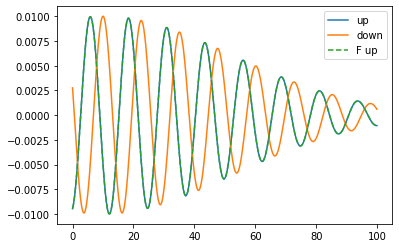

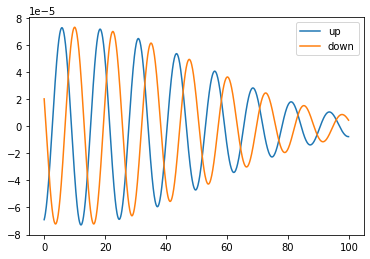

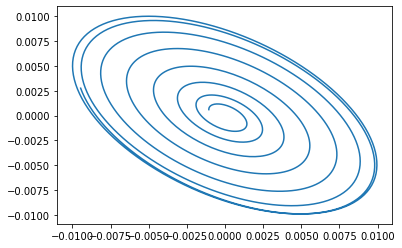

In [8]:
c = 137
π = np.pi

### inputs
w     = 0.5     ## freq of mono. light
Γ     = 100. #np.inf  ## pulse temporal-width
t0    = 10.     ## temporal offset
E_u0  = 1e-2    ##   up-E-field intensity
E_d0  = 1e-2    ## down-E-field intensity
ϕ_u   = np.pi/3 ##   up-phase 
ϕ_d   = 0.      ## down-phase 
k     = np.array([0.,0.,1.]) ## unit wave-vector
dt    = 0.1
T     = 100

t        = np.arange(0, T, dt)
dω       = 2*π / (T-dt)
Ω        = π / dt
ω        = np.arange(-Ω, Ω + dω, dω)
basis    = np.einsum("xyz, z -> xy", rotation_matrix(90), k)
subbasis = np.where( np.sum( np.abs( basis - k[None, :] ), axis=1) != 0)[0]

Eu_t =  E_u0 * np.exp( - 4*np.log(2) * (t - t0)**2/(Γ**2) - 1j * w * (t - t0) + 1j * ϕ_u )[:, None] * basis[None, subbasis[0]]
Bu_t = -E_u0 * np.exp( - 4*np.log(2) * (t - t0)**2/(Γ**2) - 1j * w * (t - t0) + 1j * ϕ_u )[:, None] * basis[None, subbasis[1]] / c
Ed_t =  E_d0 * np.exp( - 4*np.log(2) * (t - t0)**2/(Γ**2) - 1j * w * (t - t0) + 1j * ϕ_d )[:, None] * basis[None, subbasis[1]]
Bd_t = -E_d0 * np.exp( - 4*np.log(2) * (t - t0)**2/(Γ**2) - 1j * w * (t - t0) + 1j * ϕ_d )[:, None] * basis[None, subbasis[0]] / c
Au_t = c * Eu_t / (1j * w)
Ad_t = c * Ed_t / (1j * w)

Fu_t = np.zeros( (len(t), 4,4) , dtype=np.complex128)
Fu_t[:,0,1:4] = -Eu_t
Fu_t[:,1,2]   = -Bu_t[:,2]
Fu_t[:,1,3]   =  Bu_t[:,1]
Fu_t[:,2,3]   = -Bu_t[:,0]
Fu_t += -Fu_t.swapaxes(1,2)

Fd_t = np.zeros( (len(t), 4,4) , dtype=np.complex128)
Fd_t[:,0,1:4] = -Ed_t
Fd_t[:,1,2]   = -Bd_t[:,2]
Fd_t[:,1,3]   =  Bd_t[:,1]
Fd_t[:,2,3]   = -Bd_t[:,0]
Fd_t += -Fd_t.swapaxes(1,2)

A_t = np.asarray([ Au_t, Ad_t ])
E_t = np.asarray([ Eu_t, Ed_t ])
B_t = np.asarray([ Bu_t, Bd_t ])
F_t = np.asarray([ Fu_t, Fd_t ])

plt.plot(t, Eu_t.real[:,1], label="up")
plt.plot(t, Ed_t.real[:,0], label="down")
plt.plot(t, -Fu_t[:,0,2].real, label="F up", linestyle="dashed")
plt.legend()
plt.show()

plt.plot(t, Bu_t.real[:,0], label="up")
plt.plot(t, Bd_t.real[:,1], label="down")
plt.legend()
plt.show()

plt.plot(Eu_t.real[:,1], Ed_t.real[:,0])
plt.show()

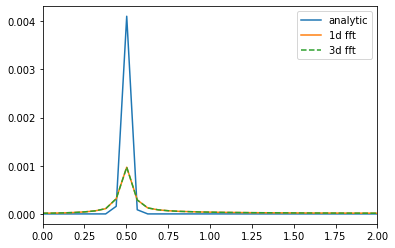

In [9]:
X = Eu_t.real[:,1]
values = np.arange(0, int(len(X)/2), 1)
af =  2 * values * Ω / (len(X))


def get_fft():
    return None

ft_E_t = Γ * E_u0 * np.exp( - Γ**2 * (w - af)**2/ (16*np.log(2)) + 1j * ( ϕ_u + w*t0) ) / np.sqrt(8*np.log(2))


fft_Eu_3d = np.fft.fft(  Eu_t.real , axis=0 ) / (len(Eu_t) * π)

fft_Eu = (np.fft.fft(  Eu_t.real[:,1]  )) / (len(Eu_t.real[:,1]) * π) ##[:int(len(A_t)/2)]

plt.plot(af, ft_E_t.real/100, label="analytic")
plt.plot(af, np.abs(fft_Eu)[:int(len(X)/2)], label="1d fft")
plt.plot(af, np.abs( fft_Eu_3d[:int(len(X)/2), 1] ), linestyle="dashed", label="3d fft")
plt.xlim([0, 2])
plt.legend()
plt.show()

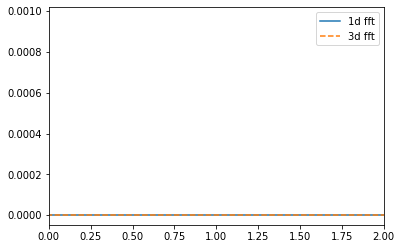

In [10]:
dω       = 2*π / (T-dt)
Ω        = π / dt
ω        = np.arange(-Ω, Ω + dω, dω)

plt.plot(ω, np.abs(fft_Eu), label="1d fft")
plt.plot(ω, np.abs( fft_Eu_3d[:, 1] ), linestyle="dashed", label="3d fft")
plt.xlim([0, 2])
plt.legend()
plt.show()

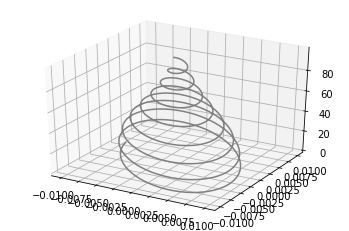

In [11]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = t
xline = Eu_t.real[:,1]
yline = Ed_t.real[:,0]
ax.plot3D(xline, yline, zline, 'gray')
fig.show()

# Fourier Transforms Domain

In [12]:
π = np.pi

dt = 0.1
T  = 10
dω = 2*π / (T-dt)
Ω  = π / dt

time = np.arange(0., T, dt)
freq = np.arange(-Ω, Ω + dω, dω)

print(time.shape)
print(freq.shape)
print( freq[0] )
print( freq[-1] )

(100,)
(100,)
-31.41592653589793
31.415926535898052


### single sine wave

dω = 0.063


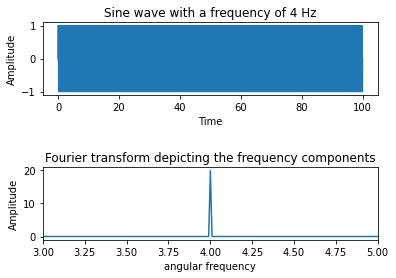

1.2580469042530888
1.2580469052311933
1.2533141373155001


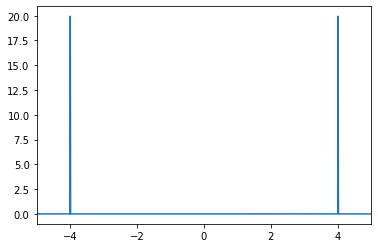

In [42]:
Ω  = 30000   ## Sampling Frequency
T  = 100   ## End time period of the signals
dt = π / Ω ## At what intervals time points
dω = 2*π / (T-dt)

# Time & Frequency points
t  = np.arange(0., T, dt)
ω  = np.arange(0., Ω, dω) ## only get positive frequencies, only works with arrays of odd length!!!
ωω = np.arange(-Ω, Ω + dω, dω)

# Create a sine wave
w1 = 4 # Frequency of the signal 1
X  = np.sin(2*π*w1*t)

# Create subplot
figure, axis = plotter.subplots(2, 1)
plotter.subplots_adjust(hspace=1)
# Time domain representation for sine wave 1
axis[0].set_title("Sine wave with a frequency of 4 Hz")
axis[0].plot(t, X)
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")

# Frequency domain representation
print("dω = %4.3f" % dω)
fourierTransform = np.sqrt(2*π)/(len(X) * dω) * np.fft.fft(X) ## Normalize amplitude
fourierTransform = fourierTransform[range(int(len(X)/2))]     ## get +frequency

# Frequency domain representation
axis[1].set_title("Fourier transform depicting the frequency components")
axis[1].plot(ω/(2*π), abs(fourierTransform))  ## angular frequencies ω/(2*π) ### for reg freq -> /(2*π)
axis[1].set_xlabel("angular frequency")
axis[1].set_ylabel("Amplitude")
axis[1].set_xlim([3, 5])
plotter.show()

print( np.trapz(abs(fourierTransform), x=ω, dx=dω) )
print( np.sum( abs(fourierTransform)*dω ) )
print( np.sqrt(π/2) )

fT = np.sqrt(2*π)/(len(X) * dω) * np.fft.fftshift( np.fft.fft(X) ) ## Normalize amplitude
plt.plot(ωω/(2*π), abs(fT))
plt.xlim([-5, 5])
plt.show()

### double sine wave

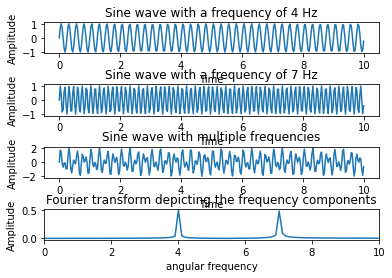

In [35]:
Ω  = 100   ## Sampling Frequency
T  = 10    ## End time period of the signals
dt = π / Ω ## At what intervals time points
dω = 2*π / (T-dt)

# Time & Frequency points
t = np.arange(0., T, dt)
ω = np.arange(0., Ω, dω) ## only get positive frequencies, only works with arrays of odd length!!!

# Create two sine waves
w1 = 4 # Frequency of the signal 1
w2 = 7 # Frequency of the signal 2
amplitude1 = np.sin(2*π*w1*t)
amplitude2 = np.sin(2*π*w2*t)

# Create subplot
figure, axis = plotter.subplots(4, 1)
plotter.subplots_adjust(hspace=1)
# Time domain representation for sine wave 1
axis[0].set_title("Sine wave with a frequency of 4 Hz")
axis[0].plot(t, amplitude1)
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
# Time domain representation for sine wave 2
axis[1].set_title("Sine wave with a frequency of 7 Hz")
axis[1].plot(t, amplitude2)
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Amplitude")
# Add the sine waves
X = amplitude1 + amplitude2
# Time domain representation of the resultant sine wave
axis[2].set_title("Sine wave with multiple frequencies")
axis[2].plot(t, X)
axis[2].set_xlabel("Time")
axis[2].set_ylabel("Amplitude")

# Frequency domain representation
fourierTransform = np.fft.fft(X)/len(X)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(X)/2))] # Exclude sampling frequency

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(ω/(2*π), abs(fourierTransform))  ## angular frequencies ω/(2*π) ### for reg freq -> /(2*π)
axis[3].set_xlabel('angular frequency')
axis[3].set_ylabel('Amplitude')
axis[3].set_xlim([0, 10])
plotter.show()

In [17]:
freq.shape

(100,)